# Plot the most recent neuroscience data resolutions

Franco Pestilli, The University of Texas 2025

Plotting data resolution in space-time and the relative size of their data.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


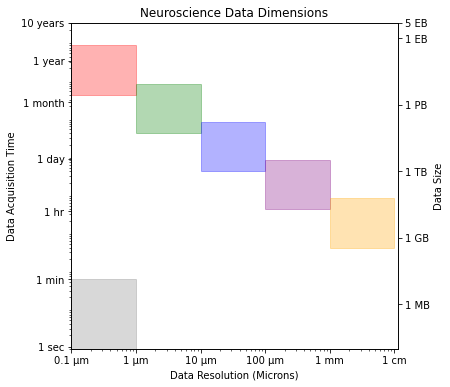

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Create a square figure and axis
fig, ax1 = plt.subplots(figsize=(6, 6))  # Square aspect ratio

# X-axis: Data resolution (log scale) from 0.1 microns to cm
x_ticks = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10]  # 0.1 microns to cm
ax1.set_xscale("log")  # Log scale for resolution
ax1.set_xticks(x_ticks)  # Set tick positions
ax1.set_xticklabels(["0.1 μm", "1 μm", "10 μm", "100 μm", "1 mm", "1 cm"])  # Custom tick labels
ax1.tick_params(axis='x', direction='out')  # Ticks outside

# Left Y-axis: Data acquisition time (log scale)
y1_ticks = [1, 60, 3600, 86400, 2.628e6, 3.154e7, 10*3.154e7]  # 30 sec to ~1 year in seconds
y1_labels = ["1 sec", "1 min", "1 hr", "1 day", "1 month", "1 year", "10 years"]
ax1.set_yscale("log")  # Log scale for time
ax1.set_yticks(y1_ticks)  # Set tick positions
ax1.set_yticklabels(y1_labels)  # Custom tick labels
ax1.set_ylabel("Data Acquisition Time")
ax1.tick_params(axis='y', direction='out')  # Ticks outside

# Right Y-axis: Data size (log scale) in MB
ax2 = ax1.twinx()  # Create a second Y-axis
y2_ticks = [1e6, 1e9, 1e12, 1e15, 1e18, 5*1e18]  # KB to EB
y2_labels = ["1 MB", "1 GB", "1 TB", "1 PB", "1 EB", "5 EB"]
ax2.set_yscale("log")  # Log scale for data size
ax2.set_yticks(y2_ticks)  # Set tick positions
ax2.set_yticklabels(y2_labels)  # Custom tick labels
ax2.set_ylabel("Data Size")
ax2.tick_params(axis='y', direction='out')  # Ticks outside
ax2.set_ylim(10*1e3, 5*1e18)  # 50 MB to 2 EB

# Labels and Title
ax1.set_xlabel("Data Resolution (Microns)")
plt.title("Neuroscience Data Dimensions")

# Set equal aspect ratio for a square plot
ax1.set_box_aspect(1.0)

# Define a simple color palette without seaborn
colors = ["red", "green", "blue", "purple", "orange", "gray"]

# Define six different rectangular regions using explicit bounds
rectangles = [
    (1e-4, 1e-3, 4e6, 8e7, colors[0]),
    (1e-3, 1e-2, 4e5, 8e6, colors[1]),
    (1e-2, 1e-1, 4e4, 8e5, colors[2]),
    (1e-1, 1,    4e3, 8e4, colors[3]),
    (1, 10,      4e2, 8e3, colors[4]),
    (1e-4, 1e-3, 0.1, 60, colors[5])
]

for (x_min, x_max, y_min, y_max, color) in rectangles:
    width = x_max - x_min
    height = y_max - y_min
    rect = Rectangle((x_min, y_min), width, height, color=color, alpha=0.3)
    ax1.add_patch(rect)

# Save the figure as a vector graphic (EPS format)
plt.savefig("density_histogram_plot.eps", format="eps")

# Show plot
plt.show()